In [6]:
import pandas as pd

df = pd.read_csv("cpi.csv")
print(df.head())
print(df.columns)


   _id  id        date state_name  state_code       commodity_group    sector  \
0    1   0  2014-01-01  All India           0  Cereals And Products  Combined   
1    2   1  2014-01-01  All India           0  Cereals And Products     Rural   
2    3   2  2014-01-01  All India           0  Cereals And Products     Urban   
3    4   3  2014-01-01  All India           0              Clothing  Combined   
4    5   4  2014-01-01  All India           0              Clothing     Rural   

     cpi  inflation_rate  
0  119.6           10.33  
1  118.9           10.60  
2  121.2            9.68  
3  115.8            8.94  
4  116.5            9.39  
Index(['_id', 'id', 'date', 'state_name', 'state_code', 'commodity_group',
       'sector', 'cpi', 'inflation_rate'],
      dtype='object')


#### I chose to work on West Bengal from the dataset, in the 1st visualisation , I have made a subplot and compared the rise in cost of education from 2014-2014, in the rural and urban sectors of West Bengal

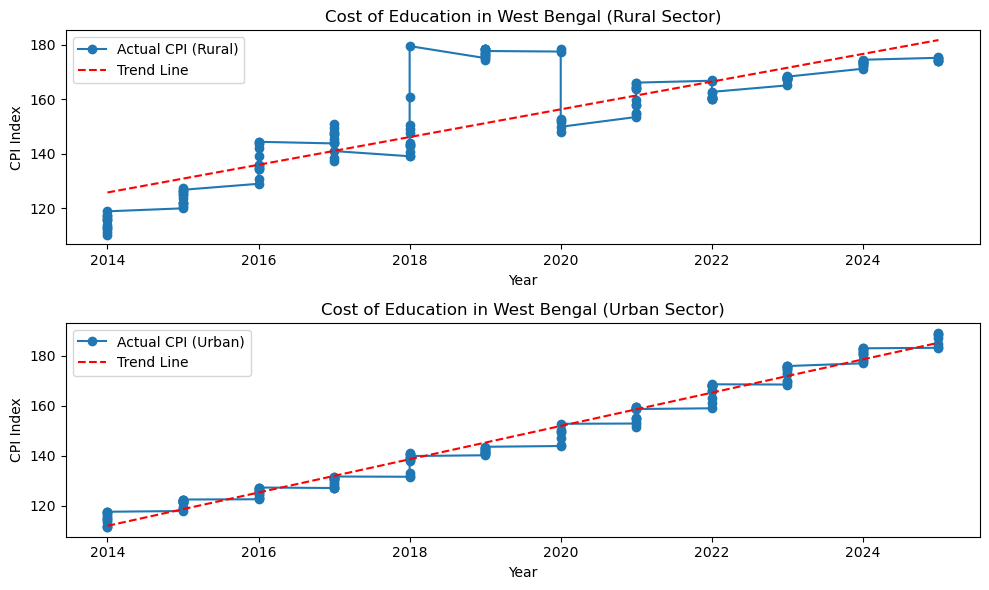

Economic Interpretation:
- Rural slope = 5.08
- Urban slope = 6.66

A higher slope means education costs are rising faster in that sector.
If the urban slope is greater, education in urban West Bengal has become
more expensive over time, likely due to private institutions and higher living costs.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load dataset
df = pd.read_csv("cpi.csv")

# Step 2: Prepare data for West Bengal and Education
wb_data = df[(df['state_name'] == 'West Bengal') & (df['commodity_group'] == 'Education')].copy()

# Convert date to year
wb_data['year'] = pd.to_datetime(wb_data['date']).dt.year

# Step 3: Separate rural and urban data
rural = wb_data[wb_data['sector'] == 'Rural']
urban = wb_data[wb_data['sector'] == 'Urban']

# Step 4: Extract x (year) and y (CPI)
x_rural, y_rural = rural['year'], rural['cpi']
x_urban, y_urban = urban['year'], urban['cpi']

# Step 5: Fit linear trend lines
rural_fit = np.polyfit(x_rural, y_rural, 1)
urban_fit = np.polyfit(x_urban, y_urban, 1)

# Predicted trend values
rural_trend = np.polyval(rural_fit, x_rural)
urban_trend = np.polyval(urban_fit, x_urban)

# Step 6: Plot subplots
plt.figure(figsize=(10, 6))

# Rural subplot
plt.subplot(2, 1, 1)
plt.plot(x_rural, y_rural, 'o-', label='Actual CPI (Rural)')
plt.plot(x_rural, rural_trend, 'r--', label='Trend Line')
plt.title('Cost of Education in West Bengal (Rural Sector)')
plt.xlabel('Year')
plt.ylabel('CPI Index')
plt.legend()

# Urban subplot
plt.subplot(2, 1, 2)
plt.plot(x_urban, y_urban, 'o-', label='Actual CPI (Urban)')
plt.plot(x_urban, urban_trend, 'r--', label='Trend Line')
plt.title('Cost of Education in West Bengal (Urban Sector)')
plt.xlabel('Year')
plt.ylabel('CPI Index')
plt.legend()

plt.tight_layout()
plt.show()

# Step 7: Economic interpretation
print("Economic Interpretation:")
print(f"- Rural slope = {rural_fit[0]:.2f}")
print(f"- Urban slope = {urban_fit[0]:.2f}")
print("\nA higher slope means education costs are rising faster in that sector.")
print("If the urban slope is greater, education in urban West Bengal has become")
print("more expensive over time, likely due to private institutions and higher living costs.")


## Visualisation-2 (Correlation between transport prices and cost of education over the years)

Correlation between Education and Transport CPI in West Bengal: 0.93


C:\Users\ayush\AppData\Local\Temp\ipykernel_17604\691844810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu['year'] = pd.to_datetime(edu['date']).dt.year
C:\Users\ayush\AppData\Local\Temp\ipykernel_17604\691844810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans['year'] = pd.to_datetime(trans['date']).dt.year


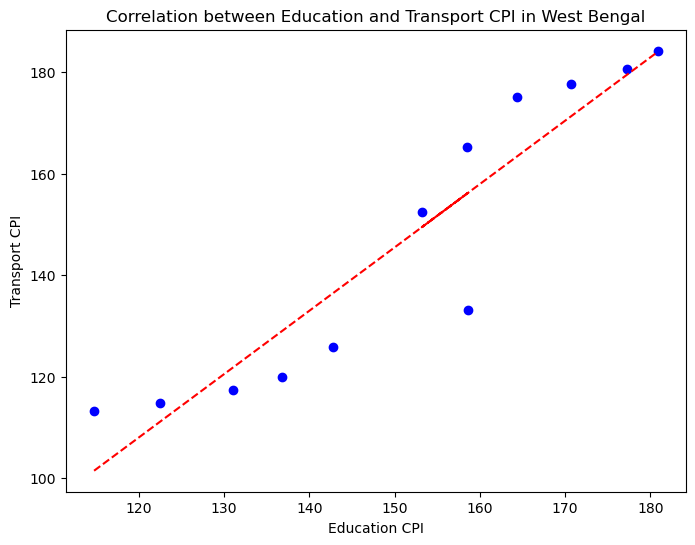

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load dataset
df = pd.read_csv("cpi.csv")

# Step 2: Filter for West Bengal
wb_data = df[df['state_name'] == 'West Bengal'].copy()

# Step 3: Keep only 'Education' and 'Transport' data
edu = wb_data[wb_data['commodity_group'].str.contains("Education", case=False)]
trans = wb_data[wb_data['commodity_group'].str.contains("Transport", case=False)]

# Step 4: Average CPI by year for each sector (both rural + urban combined)
edu['year'] = pd.to_datetime(edu['date']).dt.year
trans['year'] = pd.to_datetime(trans['date']).dt.year

edu_mean = edu.groupby('year')['cpi'].mean()
trans_mean = trans.groupby('year')['cpi'].mean()

# Step 5: Combine into a single dataframe
corr_df = pd.DataFrame({
    'Education_CPI': edu_mean,
    'Transport_CPI': trans_mean
}).dropna()

# Step 6: Compute correlation coefficient
correlation = corr_df['Education_CPI'].corr(corr_df['Transport_CPI'])
print(f"Correlation between Education and Transport CPI in West Bengal: {correlation:.2f}")

# Step 7: Visualize the relationship
plt.figure(figsize=(8,6))
plt.scatter(corr_df['Education_CPI'], corr_df['Transport_CPI'], color='blue')
plt.title("Correlation between Education and Transport CPI in West Bengal")
plt.xlabel("Education CPI")
plt.ylabel("Transport CPI")

# Fit a trend line for visual clarity
m, b = np.polyfit(corr_df['Education_CPI'], corr_df['Transport_CPI'], 1)
plt.plot(corr_df['Education_CPI'], m*corr_df['Education_CPI'] + b, color='red', linestyle='--')
plt.show()



Filters West Bengal data.

Separates Education and Transport CPI data.

Averages each by year.

Combines them to see how they move together.

Computes the correlation coefficient (value between -1 and +1).

+1 → Strong positive correlation (move together).

0 → No relationship.

-1 → Move in opposite directions.

💬 Economic Interpretation Example:

The correlation between Education and Transport CPI in West Bengal reflects the co-movement of prices in these sectors. A strong positive correlation would suggest that when transport costs rise (e.g., fuel, fares), the cost of education tends to increase as well — possibly because education services involve commuting and logistics.
If the correlation is weak, it indicates that the drivers of education inflation are more linked to institutional fees rather than transportation costs.

## Visualisation-3: CPI Composition of various commodity groups of West Bengal for the year 2025

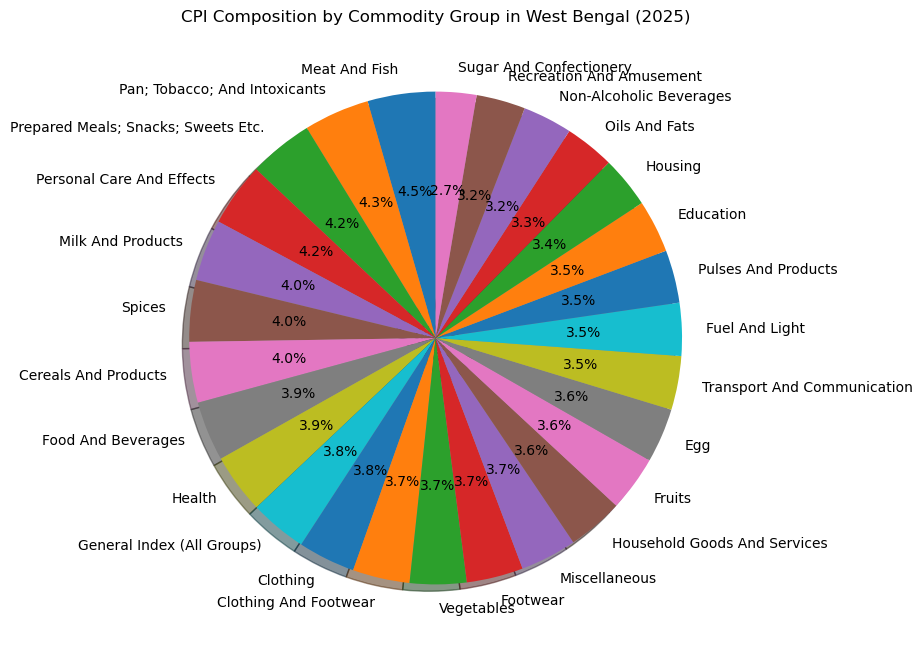

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("cpi.csv")

# Step 2: Filter data for West Bengal
wb_data = df[df['state_name'] == 'West Bengal'].copy()

# Step 3: Extract the year from date and find the latest available year
wb_data['year'] = pd.to_datetime(wb_data['date']).dt.year
latest_year = wb_data['year'].max()

# Step 4: Filter data for that latest year
wb_latest = wb_data[wb_data['year'] == latest_year]

# Step 5: Group by commodity group to find average CPI values
wb_grouped = wb_latest.groupby('commodity_group')['cpi'].mean().sort_values(ascending=False)

# Step 6: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    wb_grouped,
    labels=wb_grouped.index,
    autopct='%1.1f%%',     # show percentage values
    startangle=90,         # start at top
    shadow=True
)
plt.title(f'CPI Composition by Commodity Group in West Bengal ({latest_year})')
plt.show()


## Visualisation-4:
The bar chart depicts Uttar Pradesh’s inflation (CPI) distribution across different commodity groups in {latest_year}.                                                         Taller bars highlight sectors where inflationary pressure is strongest — for example, food, transport, or education.                                                          This helps policymakers identify which sectors are driving price rises, guiding targeted fiscal or supply-side interventions.

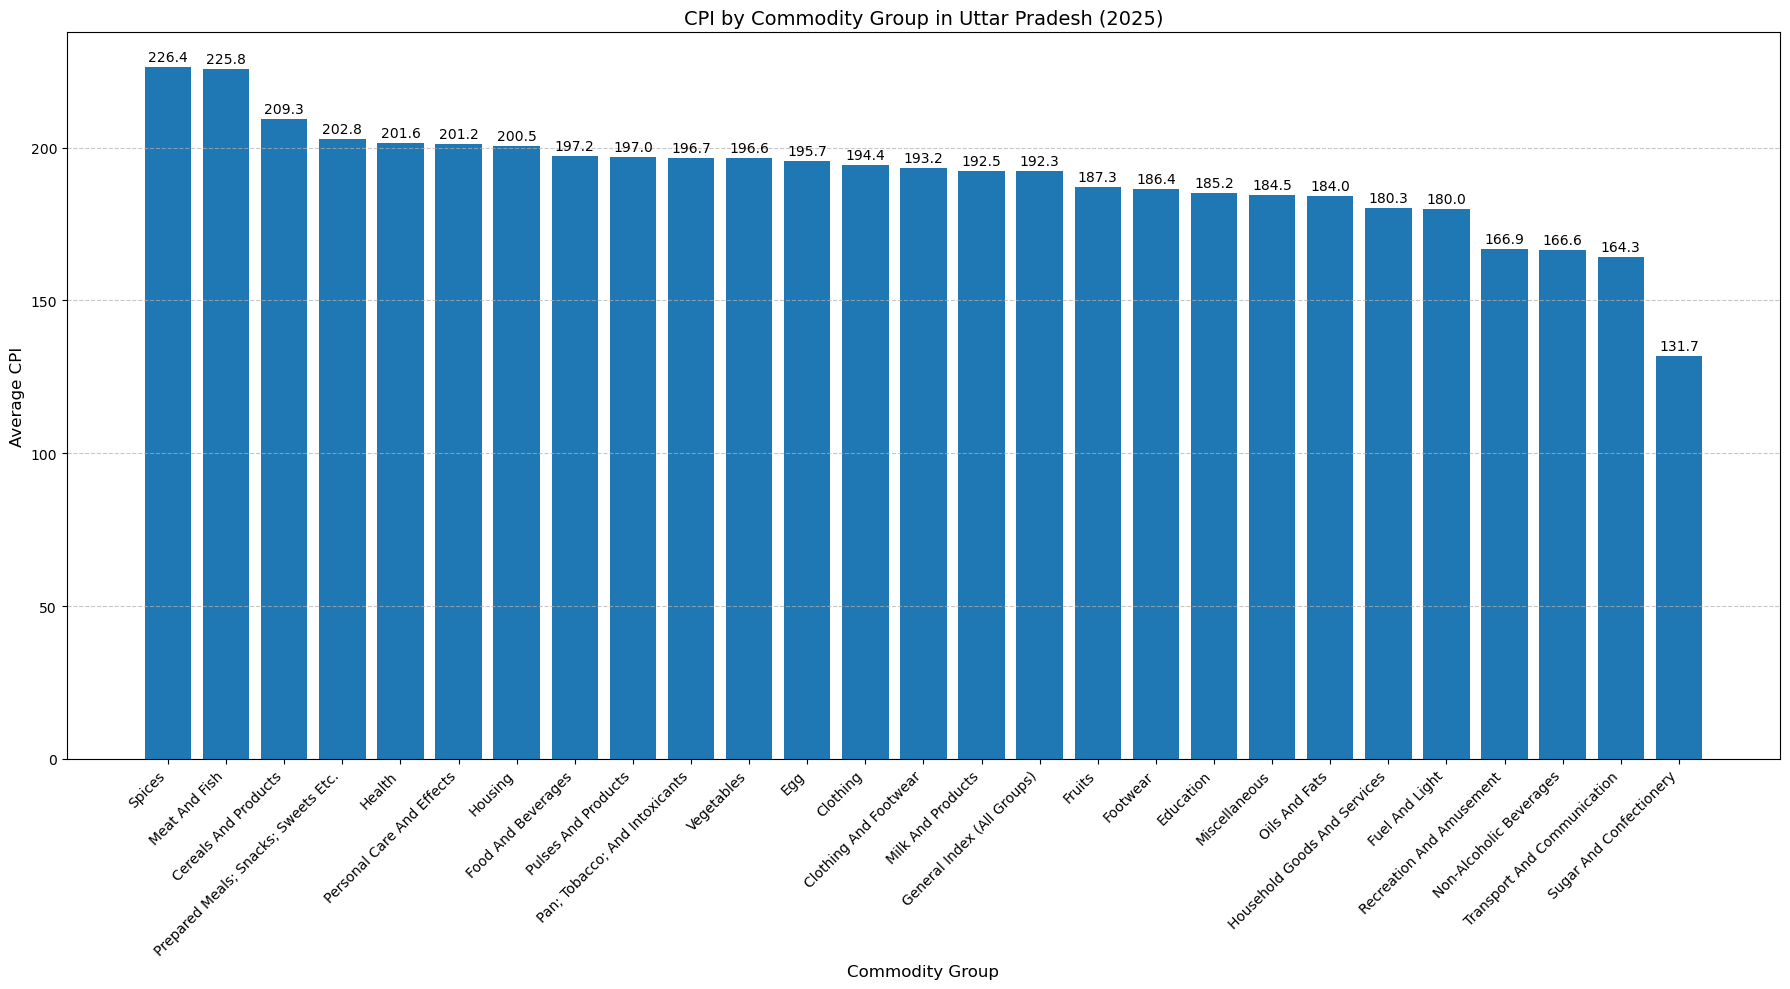

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("cpi.csv")

# Step 2: Filter data for Uttar Pradesh
up_data = df[df['state_name'] == 'Uttar Pradesh'].copy()

# Step 3: Extract year and select the latest available year
up_data['year'] = pd.to_datetime(up_data['date']).dt.year
latest_year = up_data['year'].max()

# Step 4: Filter data for the latest year
up_latest = up_data[up_data['year'] == latest_year]

# Step 5: Group by commodity group to get average CPI
up_grouped = up_latest.groupby('commodity_group')['cpi'].mean().sort_values(ascending=False)

# Step 6: Plot a bar chart
plt.figure(figsize=(18, 10))
bars = plt.bar(up_grouped.index, up_grouped.values)
plt.title(f'CPI by Commodity Group in Uttar Pradesh ({latest_year})', fontsize=14)
plt.xlabel('Commodity Group', fontsize=12)
plt.ylabel('Average CPI', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Visualisation-5: Constructed a CPI Heatmap for food items for across all states from 2014-2025

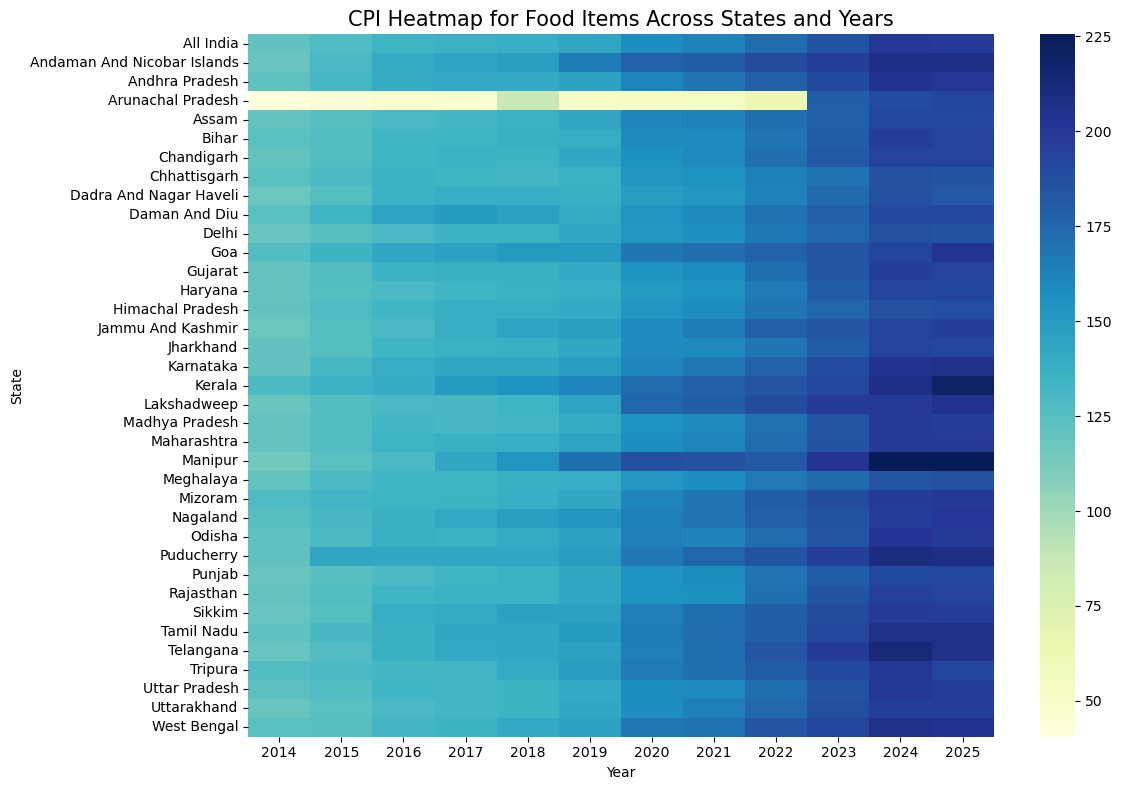

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("cpi.csv")

# Extract year
df['year'] = pd.to_datetime(df['date']).dt.year

# Filter for Food-related commodity group (you can adjust the name if slightly different)
food_data = df[df['commodity_group'].str.contains('Food', case=False, na=False)]

# Group by state and year for average CPI
food_trend = food_data.groupby(['state_name', 'year'])['cpi'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(food_trend, cmap='YlGnBu', annot=False)
plt.title('CPI Heatmap for Food Items Across States and Years', fontsize=15)
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()


 # Economic Interpretation

The heatmap visually shows how food inflation has varied across different states and over time.

Darker shades indicate higher inflation, while lighter shades represent lower price levels.

Economically:

Persistent dark bands in certain years suggest nationwide food inflation shocks — possibly due to droughts, supply disruptions, or global food price rises.

States with darker colors across all years may face structural food inflation, often due to higher dependence on imports or weaker agricultural supply chains.

This visualization helps identify which regions are most inflation-sensitive to food price shocks — useful for targeted policy interventions like food subsidies or supply stabilization.

## Visualisation-6: Area Chart comparing the overall cpi trend for UP and West Bengal over the time period (2014-2025)

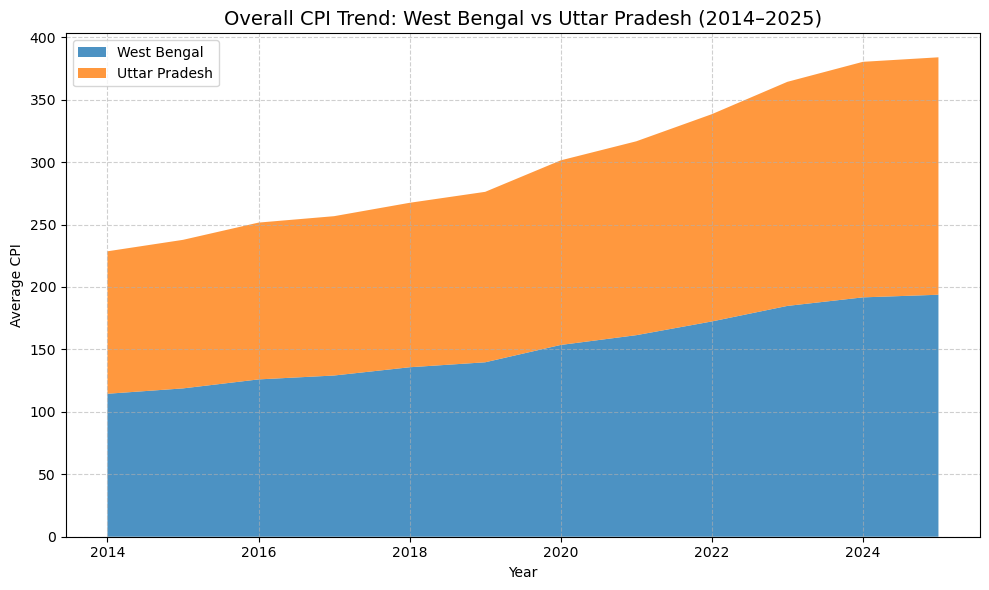

In [11]:
# Select only West Bengal and Uttar Pradesh
states = ['West Bengal', 'Uttar Pradesh']
subset = df[df['state_name'].isin(states)].copy()
subset['year'] = pd.to_datetime(subset['date']).dt.year

# Average CPI by state and year
state_trend = subset.groupby(['year', 'state_name'])['cpi'].mean().unstack()

# Plot area chart
plt.figure(figsize=(10, 6))
plt.stackplot(state_trend.index, 
              state_trend['West Bengal'], 
              state_trend['Uttar Pradesh'], 
              labels=['West Bengal', 'Uttar Pradesh'],
              alpha=0.8)

plt.title('Overall CPI Trend: West Bengal vs Uttar Pradesh (2014–2025)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average CPI')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


 # Economic Interpretation

The area chart compares the aggregate inflation trend between West Bengal and Uttar Pradesh over time.

West Bengal’s lower CPI values imply a comparatively more stable price environment, potentially reflecting better supply conditions, controlled service costs, or a different consumption structure.

Periods where both states’ CPI rise sharply together (e.g., 2019–2021) indicate nationwide inflationary shocks, such as fuel price hikes or post-pandemic effects.

Overall, this chart highlights how Uttar Pradesh faced more intense inflationary pressures than West Bengal over time, emphasizing the importance of regional economic factors in shaping state-level inflation trends.

Date of Submission- 23/10/25, Time of Submission- 8:15pm